# Taller de la Ley de Zipf

### Integrantes del grupo
- Aponte Duque, Juan - aponte.juan@javeriana.edu.co
- Cardozo Amin, Cristian - cristiancardozo@javeriana.edu.co
- Triana Ocampo, Benkos - b.triana@javeriana.edu.co

📅 **Fecha de entrega:** 11/08/2025

---
---
## 1. Introducción
La **Ley de Zipf** afirma que si ordenamos las palabras de un texto de mayor a menor frecuencia, la segunda aparecerá aproximadamente la mitad que la primera, la tercera un tercio, y así sucesivamente. Este patrón suele observarse en libros, discursos y canciones.

En canciones, la repetición (coros, muletillas, onomatopeyas) hace especialmente visible este comportamiento.

**Objetivos del taller**
1) Probar diferentes métodos de segmentación de palabras.
2) Contar las palabras y calcular su frecuencia.
3) Visualizar la relación *rango–frecuencia*.
4) Explorar variaciones al incorporar aspectos fonológicos y fonéticos.

In [1]:
#pip install nltk
#pip install transformers
#pip install fonemas
#pip install textstat

In [2]:
#Librerias

#basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from itertools import accumulate

#nltk
import nltk
from nltk.text import Text
from nltk import FreqDist
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

#Bert
from transformers import AutoTokenizer

#fonemas
from fonemas import Transcription

#Textometría
import textstat

In [3]:
#get nltk resources
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ccca1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ccca1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

---
---
## 2. Datos y fuentes

Se seleccionó una **canción por año en Colombia**, priorizando la más popular o más representativa del periodo. Si la letra no estaba disponible o la información era insuficiente para tomar una decisión, ese año fue omitido.

Toda la información se consolidó en un archivo Excel, con columnas para **año**, **título**, **artista**, **género** y **letra**. Además, esta selección se complementa con contenido de otras dos fuentes reconocidas (las listas de *El Tiempo* y *Radio Nacional de Colombia*) y con la inspiración del video musical que compartimos.

Las fuentes adicionales son:
- La lista **Las 50 mejores canciones de Colombia** del diario *El Tiempo*: 

[https://www.eltiempo.com/don-juan/cultura/las-50-mejores-canciones-de-colombia+articulo+12683827](https://www.eltiempo.com/don-juan/cultura/las-50-mejores-canciones-de-colombia+articulo+12683827)  
- La recopilación **Radio Nacional de Colombia: 80 años en 80 canciones**: 

[https://www.radionacional.co/cultura/radio-nacional-de-colombia-80-anos-en-80-canciones](https://www.radionacional.co/cultura/radio-nacional-de-colombia-80-anos-en-80-canciones)  
- El video de **FULANITOVIAJERO – Periodista Musical**: 

[https://www.youtube.com/watch?v=mUyhGhySNek&list=RDmUyhGhySNek&start_radio=1](https://www.youtube.com/watch?v=mUyhGhySNek&list=RDmUyhGhySNek&start_radio=1)


### Canciones seleccionadas (año – género – título – artista)

- 1945 – Porro – *Se va el caimán* – José María Peñaranda  
- 1946 – Bambuco – *Soy Colombiano* – Rafael Godoy (Garzón y Collazos)  
- 1947 – Rumba criolla – *La loca Margarita* – Hermanas Garavito  
- 1948 – Cumbia – *Navidad Negra* – Los Trovadores de Barú  
- 1949 – Foxtrot tropical – *Pachito E’ché* – Alex Tovar (Lucho Bermúdez y su Orq.)  
- 1950 – Joropo – *Ay si, si* – Luis Ariel Rey  
- 1951 – Bambuco – *Los cisnes* – Garzón y Collazos  
- 1952 – Vallenato – *Alicia la campesina* – Los Vallenatos del Magdalena  
- 1953 – Porro – *El año viejo* – Crescencio Salcedo  
- 1954 – Porro – *La múcura* – Lucho Bermúdez y Matilde Díaz  
- 1955 – Merecumbé – *Cosita linda* – Pacho Galán  
- 1956 – Vallenato – *Lirio rojo* – Calixto Ochoa  
- 1957 – Rumba criolla – *Por vivir en Bogotá* – Hermanas Garavito  
- 1959 – Cumbia – *El pescador* – José Barros (Los Trovadores de Barú)  
- 1960 – Cumbia – *La piragua* – José Barros (Los Black Stars)  
- 1961 – Cumbia – *La pollera colorá* – Wilson Choperena (Orq. de P. Salcedo)  
- 1962 – Porro – *La paloma guarumera* – Los Corraleros de Majagual  
- 1963 – Vallenato – *La casa en el aire* – Rafael Escalona (Bovea y sus Vallenatos)  
- 1964 – Currulao – *A la mina no voy* – Leonor González Mina  
- 1965 – Bambuco – *Pueblito viejo* – Garzón y Collazos  
- 1966 – Nueva ola – *Llorando estoy* – Vicky (Esperanza Acevedo)  
- 1967 – Cumbia – *La piragua* – Gabriel Romero & Los Black Stars  
- 1968 – Vallenato – *Pedazo de acordeón* – Alejo Durán  
- 1969 – Currulao – *Mi Buenaventura* – Peregoyo y su Combo Vacaná  
- 1970 – Balada romántica – *Llévame contigo* – Claudia de Colombia  
- 1971 – Cumbia – *Los sabanales* – Los Corraleros de Majagual (Calixto Ochoa)  
- 1972 – Balada pop – *Alguien cantó una canción* – Billy Pontoni  
- 1973 – Salsa – *La sirena* – Nelson y Sus Estrellas  
- 1974 – Salsa – *Las caleñas son como las flores* – The Latin Brothers (Joe Arroyo)  
- 1975 – Salsa – *El preso* – Fruko y Sus Tesos  
- 1976 – Vallenato – *La creciente* – Binomio de Oro de América  
- 1977 – Balada – *Llamarada* – Isadora (Fernanda Bustos)  
- 1978 – Bolero – *María de los guardias* – Helenita Vargas  
- 1979 – Cumbia tropical – *Cariñito* – Rodolfo Aicardi  
- 1980 – Carranga – *La cucharita* – Jorge Velosa y Los Carrangueros  
- 1981 – Joropo – *Ay mi llanura* – Arnulfo Briceño  
- 1982 – Vallenato – *Todo es para ti* – Diomedes Díaz  
- 1983 – Cumbia – *Golpe con golpe* – Pastor López  
- 1984 – Salsa – *Cali pachanguero* – Grupo Niche  
- 1985 – Balada pop – *¿Dónde estará mi primavera?* – Raúl Santi  
- 1986 – Salsa – *Rebelión* – Joe Arroyo y La Verdad  
- 1987 – Balada pop – *Como un picaflor* – Raúl Santi  
- 1988 – Rock en español – *La calle* – Compañía Ilimitada  
- 1989 – Balada – *La causa nacional* – Sociedad Anónima  
- 1990 – Salsa – *Una aventura* – Grupo Niche  
- 1991 – Cumbia – *Colombia tierra querida* – Lucho Bermúdez & Matilde Díaz  
- 1993 – Vallenato fusión – *La gota fría* – Carlos Vives  
- 1994 – Vallenato – *El santo cachón* – Los Embajadores Vallenatos  
- 1995 – Pop latino – *Estoy aquí* – Shakira  
- 1996 – Jazz-folk – *Los caminos de la vida* – Los Diablitos (Omar Geles)  
- 1997 – Tropipop – *La tierra del olvido* – Carlos Vives  
- 1998 – Rock – *Florecita rockera* – Aterciopelados  
- 1999 – Pop-rock – *Me voy* – Andrés Cepeda  
- 2000 – Rock – *Fíjate bien* – Juanes  
- 2001 – Pop rock – *Suerte (Whenever, Wherever)* – Shakira  
- 2002 – Rock – *A Dios le pido* – Juanes  
- 2004 – Salsa – *La pantera mambo* – La 33  
- 2005 – Pop rock – *La camisa negra* – Juanes  
- 2007 – Hip-hop – *Somos pacífico* – ChocQuibTown  
- 2008 – Electro-cumbia – *Fuego* – Bomba Estéreo  
- 2009 – Electro-folk – *Mi Kolombia* – Systema Solar  
- 2010 – Pop – *Waka Waka* – Shakira (ft. Freshlyground)  
- 2011 – Hip-hop – *Chocolate* – Profetas  
- 2012 – Swing – *Suín Romanticón* – Monsieur Periné  
- 2013 – Pop-vallenato – *Volví a nacer* – Carlos Vives  
- 2014 – Reguetón – *6 AM* – J Balvin (ft. Farruko)  
- 2015 – Reguetón – *Ginza* – J Balvin  
- 2016 – Vallenato-pop – *La bicicleta* – Carlos Vives & Shakira  
- 2017 – Reguetón – *Mi gente* – J Balvin & Willy William  
- 2018 – Reguetón – *Mi cama* – Karol G  
- 2019 – Reguetón-pop – *Tusa* – Karol G (ft. Nicki Minaj)  
- 2020 – Reguetón-pop – *Hawái* – Maluma  
- 2021 – Reguetón – *Bichota* – Karol G  
- 2022 – Reguetón – *Provenza* – Karol G  
- 2023 – Reguetón-pop – *TQG (Te Quedó Grande)* – Karol G & Shakira  
- 2024 – Reguetón-pop – *LUNA* – ATL Jacob & Feid  
- 2025 – Pop – *Enamorarte Mil Veces* – Fonseca & Manuel Medrano  

In [4]:
data_lyrics = pd.read_excel('../data/input/Canciones_Colombianas_1945_2023.xlsx')
data_lyrics.head(3)

,year,song,autor,genero,letra
0,1945,Se va el caimán,José María Peñaranda,Porro,Voy a empezar mi relato con alegría y con afán...
1,1946,Soy Colombiano,Rafael Godoy (Garzón y Collazos),Bambuco,"A mí deme un aguardiente, un aguardiente de ca..."
2,1947,La loca Margarita,Hermanas Garavito,Rumba criolla,Hay en Bogotá una loquita \nque lleva siempre ...


### 2.1. Distribución de géneros
Calculamos y graficamos la distribución de géneros musicales

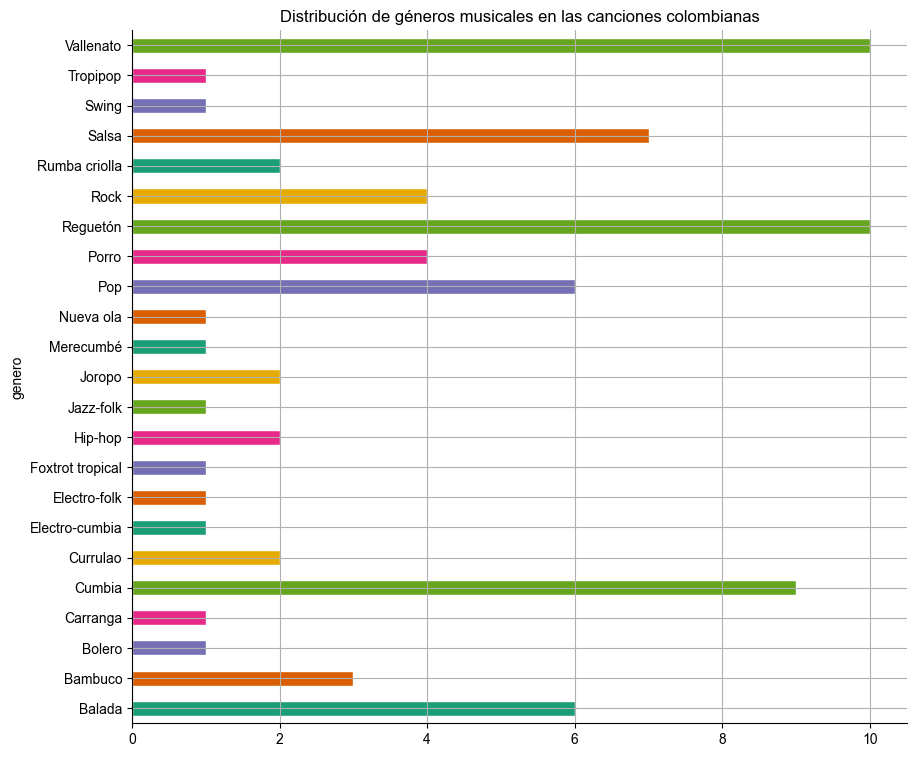

In [5]:
plt.figure(figsize=(10, 9))
plt.title('Distribución de géneros musicales en las canciones colombianas')
plt.xlabel('Número de canciones')
plt.ylabel('Género musical')
sns.set_style("whitegrid")
sns.set_palette("Dark2")
data_lyrics.sort_values(by=['genero']).groupby(['genero']).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

---
---
# 3. Análisis léxico y validación de la Ley de Zipf

Esta sección realiza la tokenización del texto de cada canción, el cálculo de la frecuencia de aparición de cada palabra y la visualización de la distribución de frecuencias.

El objetivo es verificar si las canciones siguen el comportamiento propuesto por la Ley de Zipf.

Se observará si la frecuencia de una palabra está inversamente relacionada con su posición en el ranking de palabras más usadas.

### 3.1. Tokenización: NLTK vs alternativas

- Spanish & NLTK
- Tweet
- BERT (base)
- RoBERTa entrenado en corpus en español

Adelantándonos a la conclusión, se optó por el tokenizador en español de NLTK, ya que no realiza transformaciones sobre los tokens y, además, facilita su interpretación, lo que resulta ventajoso para el análisis posterior.

In [6]:
#get example text
example_text = data_lyrics['letra'][45]
print(f"Texto de ejemplo: {example_text[:200]}...")

# Tokenización spanish
tokens = word_tokenize(language="spanish", text=example_text)
text = Text(tokens)
print("Tokenización nltk & spanish")
for i in range(0, min(len(text), 100), 10):
    print(text[i:i+10])

Texto de ejemplo: Colombia, tierra querida,
himno de fe y armonía.
Cantemos, cantemos todos
grito de paz y alegría.

Vivemos, siempre vivemos
a nuestra patria querida.
Su suelo es una oración
y es un canto de la vida.
...
Tokenización nltk & spanish
['Colombia', ',', 'tierra', 'querida', ',', 'himno', 'de', 'fe', 'y', 'armonía']
['.', 'Cantemos', ',', 'cantemos', 'todos', 'grito', 'de', 'paz', 'y', 'alegría']
['.', 'Vivemos', ',', 'siempre', 'vivemos', 'a', 'nuestra', 'patria', 'querida', '.']
['Su', 'suelo', 'es', 'una', 'oración', 'y', 'es', 'un', 'canto', 'de']
['la', 'vida', '.', 'Su', 'suelo', 'es', 'una', 'oración', 'y', 'es']
['un', 'canto', 'de', 'la', 'vida', '.', 'Cantando', ',', 'cantando', 'yo']
['viviré', ',', 'Colombia', ',', 'tierra', 'querida', '.', 'Cantando', ',', 'cantando']
['yo', 'viviré', ',', 'Colombia', ',', 'tierra', 'querida', '.', 'Colombia', ',']
['te', 'hiciste', 'grande', 'con', 'el', 'furor', 'de', 'tu', 'gloria', ',']
['la', 'América', 'toda', 'canta', '

In [7]:
print(f"Texto de ejemplo: {example_text[:200]}...")

# Tokenización tweet
tokenTweet = TweetTokenizer()
tokens_tweet = tokenTweet.tokenize(text=example_text)
text_tweet = Text(tokens_tweet)

print("Tokenización tweet")
for i in range(0, min(len(text_tweet), 100), 10):
    print(text_tweet[i:i+10])

Texto de ejemplo: Colombia, tierra querida,
himno de fe y armonía.
Cantemos, cantemos todos
grito de paz y alegría.

Vivemos, siempre vivemos
a nuestra patria querida.
Su suelo es una oración
y es un canto de la vida.
...
Tokenización tweet
['Colombia', ',', 'tierra', 'querida', ',', 'himno', 'de', 'fe', 'y', 'armonía']
['.', 'Cantemos', ',', 'cantemos', 'todos', 'grito', 'de', 'paz', 'y', 'alegría']
['.', 'Vivemos', ',', 'siempre', 'vivemos', 'a', 'nuestra', 'patria', 'querida', '.']
['Su', 'suelo', 'es', 'una', 'oración', 'y', 'es', 'un', 'canto', 'de']
['la', 'vida', '.', 'Su', 'suelo', 'es', 'una', 'oración', 'y', 'es']
['un', 'canto', 'de', 'la', 'vida', '.', 'Cantando', ',', 'cantando', 'yo']
['viviré', ',', 'Colombia', ',', 'tierra', 'querida', '.', 'Cantando', ',', 'cantando']
['yo', 'viviré', ',', 'Colombia', ',', 'tierra', 'querida', '.', 'Colombia', ',']
['te', 'hiciste', 'grande', 'con', 'el', 'furor', 'de', 'tu', 'gloria', ',']
['la', 'América', 'toda', 'canta', 'la', 'flo

In [8]:
print(f"Texto de ejemplo: {example_text[:200]}...")

# Tokenización tweet
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokens_bert = tokenizer.tokenize(example_text)
text_bert = Text(tokens_bert)

print("Tokenización BERT")
for i in range(0, min(len(text_bert), 100), 10):
    print(text_bert[i:i+10])

Texto de ejemplo: Colombia, tierra querida,
himno de fe y armonía.
Cantemos, cantemos todos
grito de paz y alegría.

Vivemos, siempre vivemos
a nuestra patria querida.
Su suelo es una oración
y es un canto de la vida.
...
Tokenización BERT
['Colombia', ',', 'tier', '##ra', 'que', '##rida', ',', 'him', '##no', 'de']
['f', '##e', 'y', 'arm', '##on', '##ía', '.', 'Can', '##tem', '##os']
[',', 'can', '##tem', '##os', 'to', '##dos', 'g', '##rito', 'de', 'p']
['##az', 'y', 'ale', '##g', '##r', '##ía', '.', 'V', '##ive', '##mos']
[',', 'si', '##em', '##p', '##re', 'v', '##ive', '##mos', 'a', 'n']
['##uest', '##ra', 'pat', '##ria', 'que', '##rida', '.', 'Su', 'sue', '##lo']
['es', 'un', '##a', 'or', '##ac', '##ión', 'y', 'es', 'un', 'can']
['##to', 'de', 'la', 'v', '##ida', '.', 'Su', 'sue', '##lo', 'es']
['un', '##a', 'or', '##ac', '##ión', 'y', 'es', 'un', 'can', '##to']
['de', 'la', 'v', '##ida', '.', 'Can', '##tan', '##do', ',', 'can']


In [9]:
print(f"Texto de ejemplo: {example_text[:200]}...")

tokenizer_bert_spanish = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
tokens_bert_spanish = tokenizer_bert_spanish.tokenize(example_text)
text_bert_spanish = Text(tokens_bert_spanish)

print("Tokenización BERT SPANISH")
for i in range(0, min(len(text_bert_spanish), 100), 10):
    print(text_bert_spanish[i:i+10])

Texto de ejemplo: Colombia, tierra querida,
himno de fe y armonía.
Cantemos, cantemos todos
grito de paz y alegría.

Vivemos, siempre vivemos
a nuestra patria querida.
Su suelo es una oración
y es un canto de la vida.
...
Tokenización BERT SPANISH
['colombia', ',', 'tierra', 'querida', ',', 'himno', 'de', 'fe', 'y', 'armonía']
['.', 'cante', '##mos', ',', 'cante', '##mos', 'todos', 'grito', 'de', 'paz']
['y', 'alegría', '.', 'vive', '##mos', ',', 'siempre', 'vive', '##mos', 'a']
['nuestra', 'patria', 'querida', '.', 'su', 'suelo', 'es', 'una', 'oración', 'y']
['es', 'un', 'canto', 'de', 'la', 'vida', '.', 'su', 'suelo', 'es']
['una', 'oración', 'y', 'es', 'un', 'canto', 'de', 'la', 'vida', '.']
['cantando', ',', 'cantando', 'yo', 'vivir', '##é', ',', 'colombia', ',', 'tierra']
['querida', '.', 'cantando', ',', 'cantando', 'yo', 'vivir', '##é', ',', 'colombia']
[',', 'tierra', 'querida', '.', 'colombia', ',', 'te', 'hiciste', 'grande', 'con']
['el', 'fur', '##or', 'de', 'tu', 'gloria', 

### 3.2. Frecuencia de palabras
Calculamos la frecuencia de las palabras y graficamos las **100 más comunes**.

In [10]:
def concatenate_column(df, column_name, separator=' | '):
    concatenated_string = df[column_name].astype(str).str.cat(sep=separator)
    return concatenated_string

In [11]:
tokens_letra = Text(word_tokenize(language="spanish", text=concatenate_column(data_lyrics, 'letra')))

In [12]:
fdist1 = FreqDist(tokens_letra)
fdist1.tabulate(50)

   ,  que   la   de   no    a   el   me   mi    Y    y   te    (    )   en    '  con   se   yo   es  Que  por   lo   tu   un  una  los    .   No como  las   Yo   La   Ay   pa amor    |   sí para   le   mí   si   al todo vida   ti   El    ?  del   Me 
1099  594  521  472  362  344  316  304  287  285  255  241  224  224  221  219  207  194  180  174  158  153  153  149  144  121  113  113  105   95   94   91   87   83   82   79   76   76   74   71   68   67   65   65   65   65   63   62   62   62 


<Axes: title={'center': 'Frecuencia de las 100 palabras más comunes en las letras de canciones colombianas (1945-2025)'}, xlabel='Samples', ylabel='Percents'>

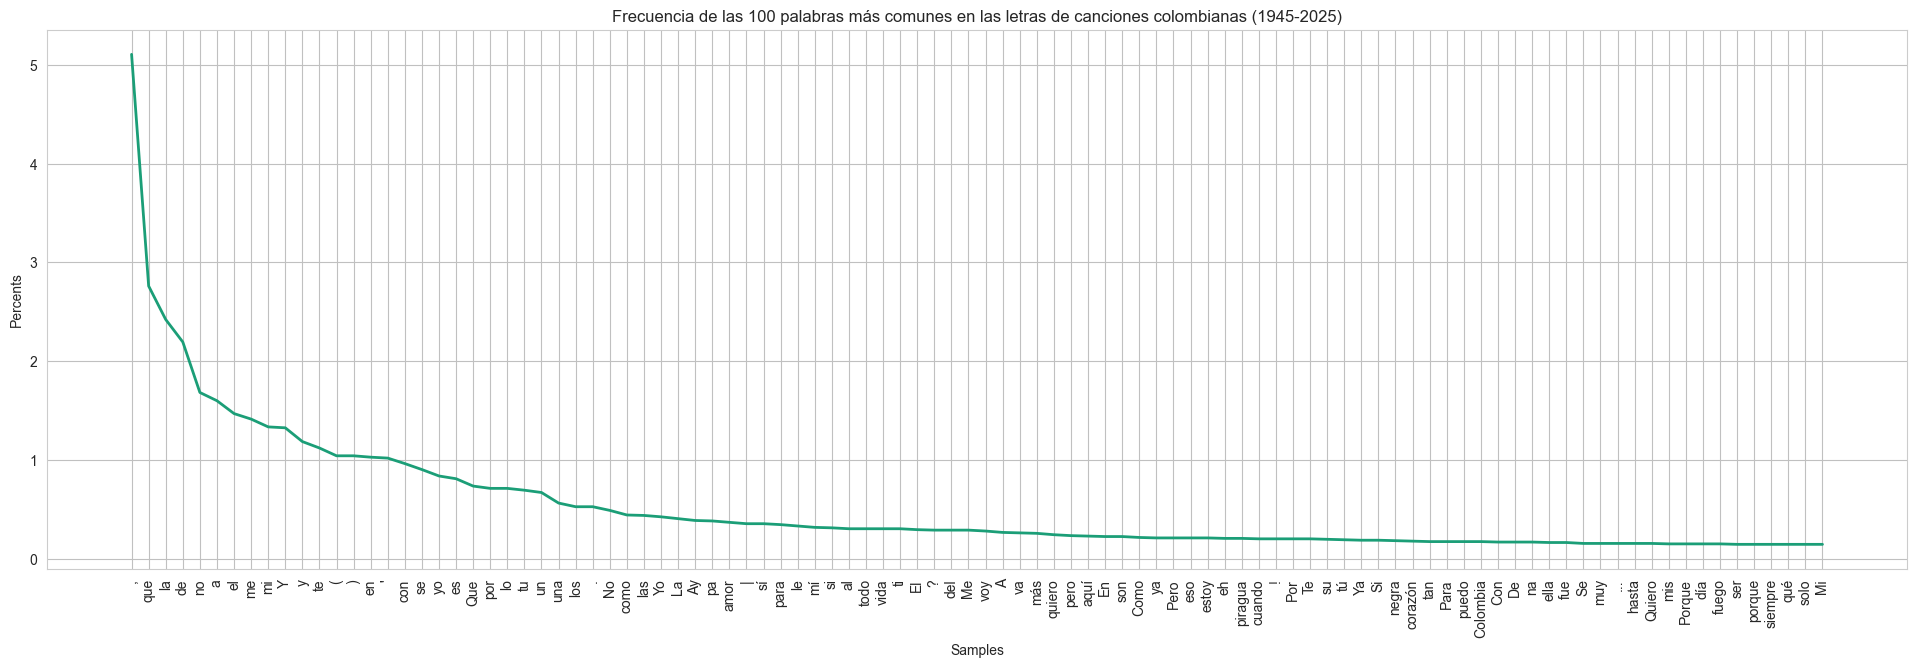

In [13]:
fig = plt.figure(figsize = (24, 7))
fdist1.plot(100,percents=True, title = 'Frecuencia de las 100 palabras más comunes en las letras de canciones colombianas (1945-2025)')

<Axes: title={'center': 'Frecuencia acumulada de las 100 palabras más comunes en las letras de canciones colombianas (1945-2025)'}, xlabel='Samples', ylabel='Cumulative Percents'>

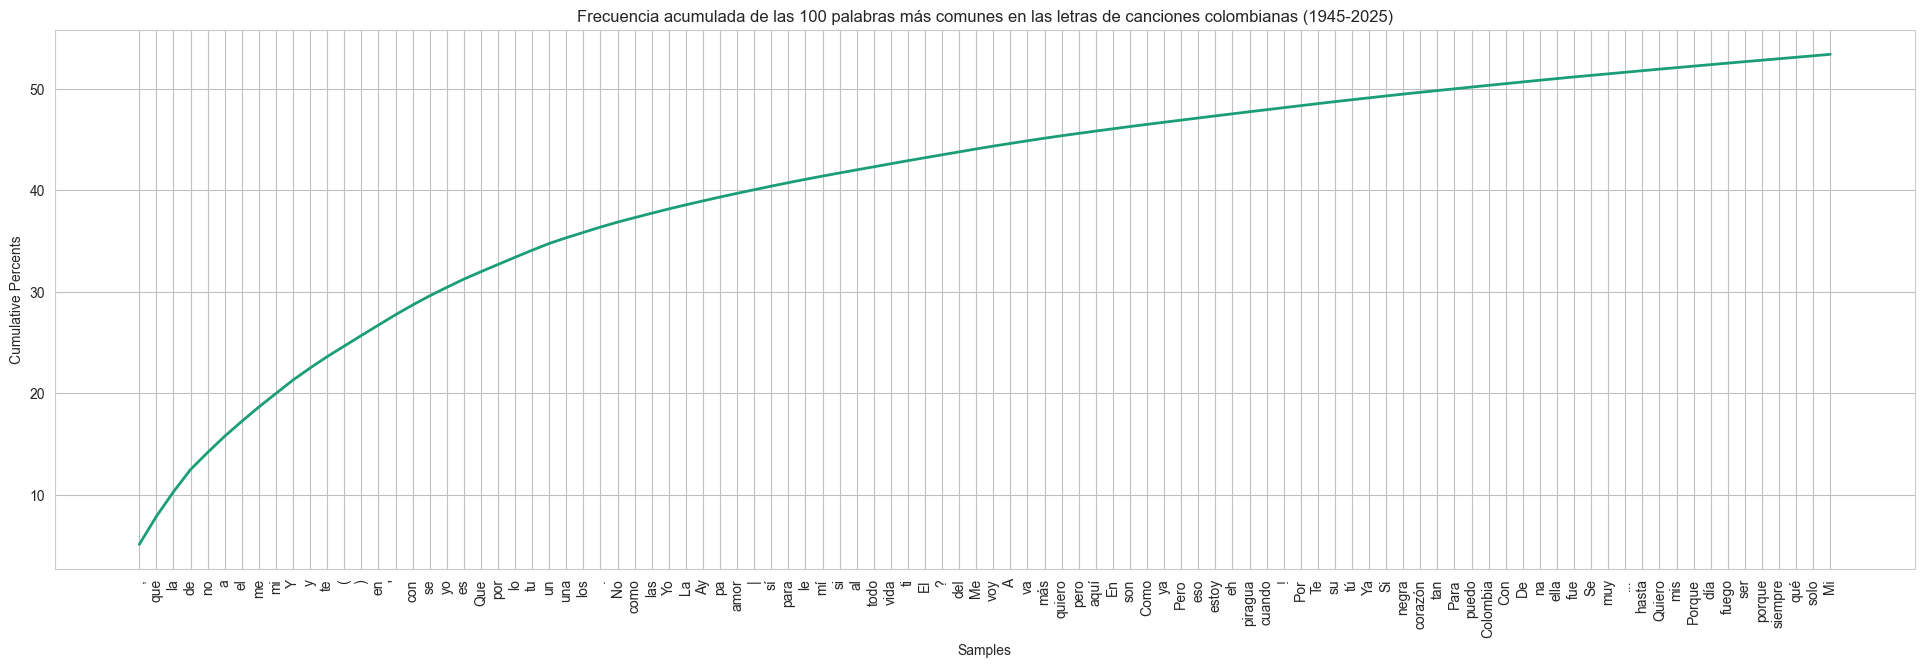

In [14]:
fig = plt.figure(figsize = (24, 7))
fdist1.plot(100, cumulative=True, percents=True, title = 'Frecuencia acumulada de las 100 palabras más comunes en las letras de canciones colombianas (1945-2025)')

### 3.3. Validación de la ley de Zipf (escala log–log)
Si la relación *rango–frecuencia* sigue una pendiente aproximadamente lineal en log–log, es compatible con la Ley de Zipf.

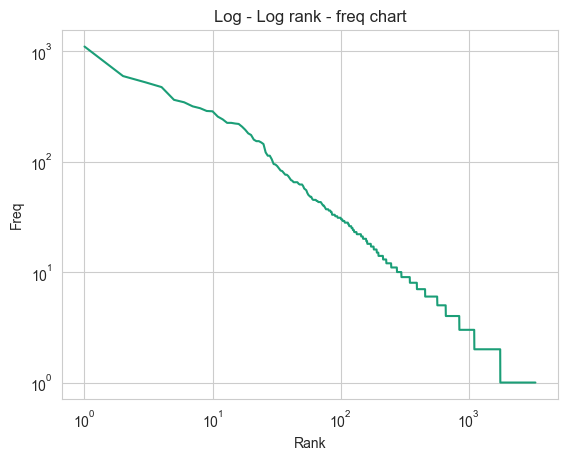

In [15]:
# Funcion
fd = {k: v for k, v in sorted(fdist1.items(), key=lambda item: item[1], reverse=True)}

ranks = []
freqs = []

for rank, word in enumerate(fd):
    ranks.append(rank + 1)
    freqs.append(fd[word])

# Gráfico Ley de Zipf
plt.loglog(ranks, freqs)
plt.xlabel('Rank')
plt.ylabel('Freq')
plt.title('Log - Log rank - freq chart')
plt.show()

El comportamiento de la curva en escala log-log confirma la ley de zifp que unas pocas palabras concentran gran parte de las apariciones, mientras que la mayoría son muy poco frecuentes.

### 3.4. Repetición del análisis sin *stop words*
Eliminamos palabras funcionales comunes (el, la, de, y, ...). Si no están disponibles las *stopwords* de NLTK, se usa un listado mínimo.

In [16]:
#get stop words
list_words_sw = stopwords.words('spanish')

In [17]:
words = [word.lower() for word in word_tokenize(language="spanish", text=concatenate_column(data_lyrics, 'letra')) if word.lower() not in list_words_sw and word.isalnum()]

9570


<Axes: title={'center': 'Frecuencia de las 100 palabras más comunes SIN STOPWORDS en las letras de canciones colombianas (1945-2025)'}, xlabel='Samples', ylabel='Percents'>

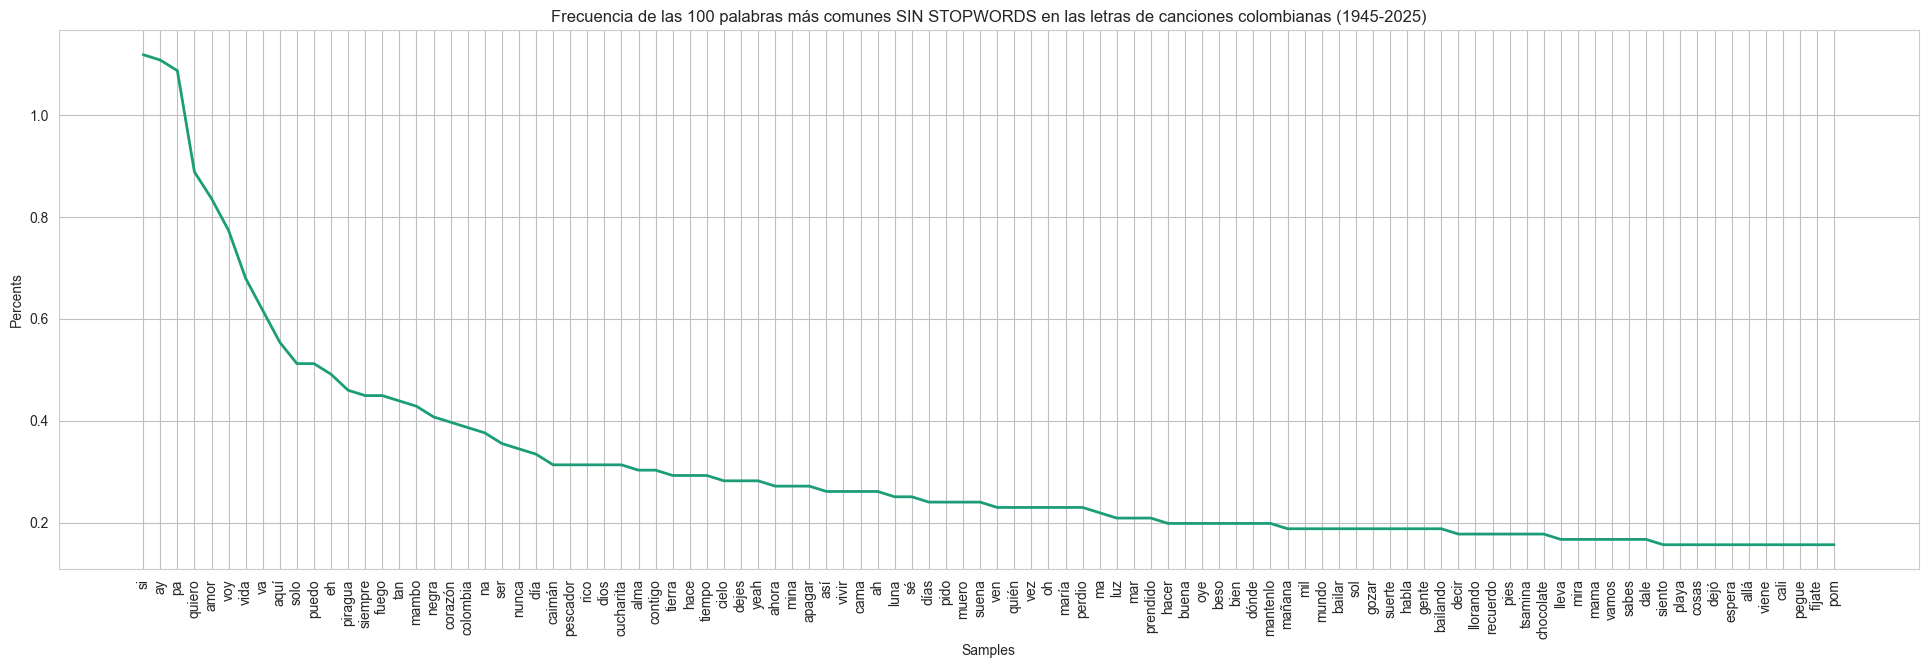

In [18]:
# Gráfico
fig = plt.figure(figsize = (24, 7))
print(len(words))
fd = FreqDist(words)
fd.plot(100, percents=True, title = 'Frecuencia de las 100 palabras más comunes SIN STOPWORDS en las letras de canciones colombianas (1945-2025)')

---
---
# 4. Análisis fonológico y fonético

En esta parte, se va ha transcribir fonéticamente las palabras de las canciones seleccionadas. El análisis fonológico permite observar los patrones sonoros del lenguaje en las canciones

In [19]:
words_fonetico = words

In [20]:
test_word = "esternocleidomastoideo"
print(f"Palabra de prueba '{test_word}':")

transcription = Transcription(test_word)
print(f"Transcripción fonológico: {transcription.phonology.words}")
print(f"Transcripción fonético: {transcription.phonetics.words}")

print(f"Transcripción fonológico: {transcription.phonology.syllables}")
print(f"Transcripción fonético: {transcription.phonetics.syllables}")

Palabra de prueba 'esternocleidomastoideo':
Transcripción fonológico: ['esteɾnoklejdomastojˈdeo']
Transcripción fonético: ['esteɾnoklejðomastojˈðeo']
Transcripción fonológico: ['es', 'teɾ', 'no', 'klej', 'do', 'mas', 'toj', 'ˈde', 'o']
Transcripción fonético: ['es', 'teɾ', 'no', 'klej', 'ðo', 'mas', 'toj', 'ˈðe', 'o']


In [21]:
for token in words_fonetico[:10]:

    if not token.strip():
        print(f"Token vacío: '{token}'")
        continue

    transcription = Transcription(token)
    print(f"Palabra: {token}")
    print(f"Transcripción fonológico: {transcription.phonology.words}")
    print(f"Transcripción fonético: {transcription.phonetics.words}")
    print(f"Transcripción fonológico: {transcription.phonology.syllables}")

Palabra: voy
Transcripción fonológico: ['boj']
Transcripción fonético: ['boj']
Transcripción fonológico: ['ˈboj']
Palabra: empezar
Transcripción fonológico: ['empeˈθaɾ']
Transcripción fonético: ['empeˈθaɾ']
Transcripción fonológico: ['em', 'pe', 'ˈθaɾ']
Palabra: relato
Transcripción fonológico: ['reˈlato']
Transcripción fonético: ['reˈlato']
Transcripción fonológico: ['re', 'ˈla', 'to']
Palabra: alegría
Transcripción fonológico: ['aleˈgɾia']
Transcripción fonético: ['aleˈɣɾia']
Transcripción fonológico: ['a', 'le', 'ˈgɾi', 'a']
Palabra: afán
Transcripción fonológico: ['aˈfan']
Transcripción fonético: ['aˈfan']
Transcripción fonológico: ['a', 'ˈfan']
Palabra: alegría
Transcripción fonológico: ['aleˈgɾia']
Transcripción fonético: ['aleˈɣɾia']
Transcripción fonológico: ['a', 'le', 'ˈgɾi', 'a']
Palabra: afán
Transcripción fonológico: ['aˈfan']
Transcripción fonético: ['aˈfan']
Transcripción fonológico: ['a', 'ˈfan']
Palabra: voy
Transcripción fonológico: ['boj']
Transcripción fonético: ['b

In [22]:
tokens_limpios = [t for t in words_fonetico if re.search(r'[a-zA-ZáéíóúÁÉÍÓÚüÜñÑ]', t) and len(t.strip()) > 1]
tokens_transcritos = [Transcription(token) for token in tokens_limpios]

In [23]:
tokens_words_fonologico = []
for i in tokens_transcritos:
    words = i.phonology.words
    tokens_words_fonologico.extend(words)

print(f"Tokens fonológico: {tokens_words_fonologico[:10]}")

Tokens fonológico: ['boj', 'empeˈθaɾ', 'reˈlato', 'aleˈgɾia', 'aˈfan', 'aleˈgɾia', 'aˈfan', 'boj', 'empeˈθaɾ', 'reˈlato']


In [24]:
#words
tokens_words_fonologico = [w for i in tokens_transcritos for w in i.phonology.words]
tokens_words_fonetico = [w for i in tokens_transcritos for w in i.phonetics.words]

#words
tokens_silabas_fonologico = [w for i in tokens_transcritos for w in i.phonology.syllables]
tokens_silabas_fonetico = [w for i in tokens_transcritos for w in i.phonetics.syllables]

In [25]:
tokens_silabas_fonologico[:10]

['ˈboj', 'em', 'pe', 'ˈθaɾ', 're', 'ˈla', 'to', 'a', 'le', 'ˈgɾi']

       aj        si        pa    ˈkjeɾo     aˈmoɾ       boj     ˈbida     ˈsolo        ba      aˈki         e    ˈpwedo  piˈɾagwa  ˈsjempɾe       tan    ˈfwego    ˈmambo    ˈnegɾa  koɾaˈθon koˈlombja        na       seɾ    ˈnunka      ˈdia   kajˈman peskaˈdoɾ     ˈriko      djos kuʧaˈɾita     ˈalma  konˈtigo      ˈʝea    ˈtjera      ˈaθe   ˈtjempo    ˈθjelo    ˈdexes     aˈoɾa     ˈmina   apaˈgaɾ      aˈsi    biˈbiɾ     ˈkama         a     ˈluna        se     ˈdias     ˈpido    ˈmweɾo    ˈswena 
      108       107       104        85        80        74        65        63        60        53        49        49        44        43        43        43        41        39        38        37        36        34        33        32        30        30        30        30        30        29        29        29        28        28        28        27        27        26        26        26        25        25        25        25        24        24        23        23        23        23

<Axes: xlabel='Samples', ylabel='Percents'>

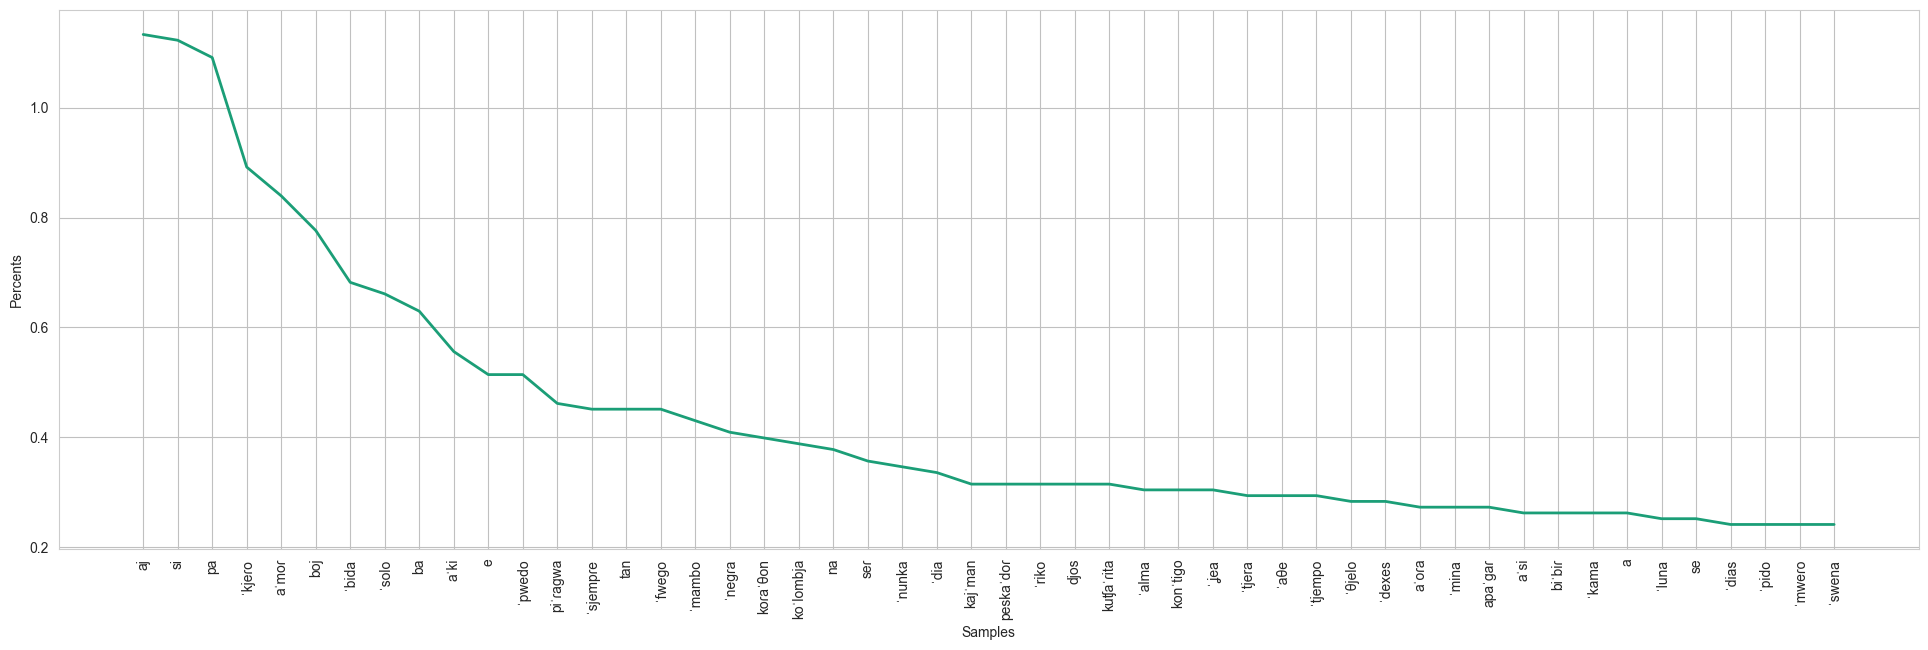

In [26]:
fig = plt.figure(figsize = (24, 7))
fd_words_fonologico = FreqDist(tokens_words_fonologico)
fd_words_fonologico.tabulate(50)
fd_words_fonologico.plot(50, percents=True)

       aj        si        pa    ˈkjeɾo     aˈmoɾ       boj     ˈbiða     ˈsolo        ba      aˈki         e    ˈpweðo  piˈɾaɣwa  ˈsjempɾe       tan    ˈfweɣo    ˈmambo    ˈneɣɾa  koɾaˈθon koˈlombja        na       seɾ    ˈnuŋka      ˈdia   kajˈman peskaˈðoɾ     ˈriko      djos kuʧaˈɾita     ˈalma  konˈtiɣo      ˈʝea    ˈtjera      ˈaθe   ˈtjempo    ˈθjelo    ˈdexes     aˈoɾa     ˈmina   apaˈɣaɾ      aˈsi    biˈβiɾ     ˈkama         a     ˈluna        se     ˈdias     ˈpiðo    ˈmweɾo    ˈswena 
      108       107       104        85        80        74        65        63        60        53        49        49        44        43        43        43        41        39        38        37        36        34        33        32        30        30        30        30        30        29        29        29        28        28        28        27        27        26        26        26        25        25        25        25        24        24        23        23        23        23

<Axes: xlabel='Samples', ylabel='Percents'>

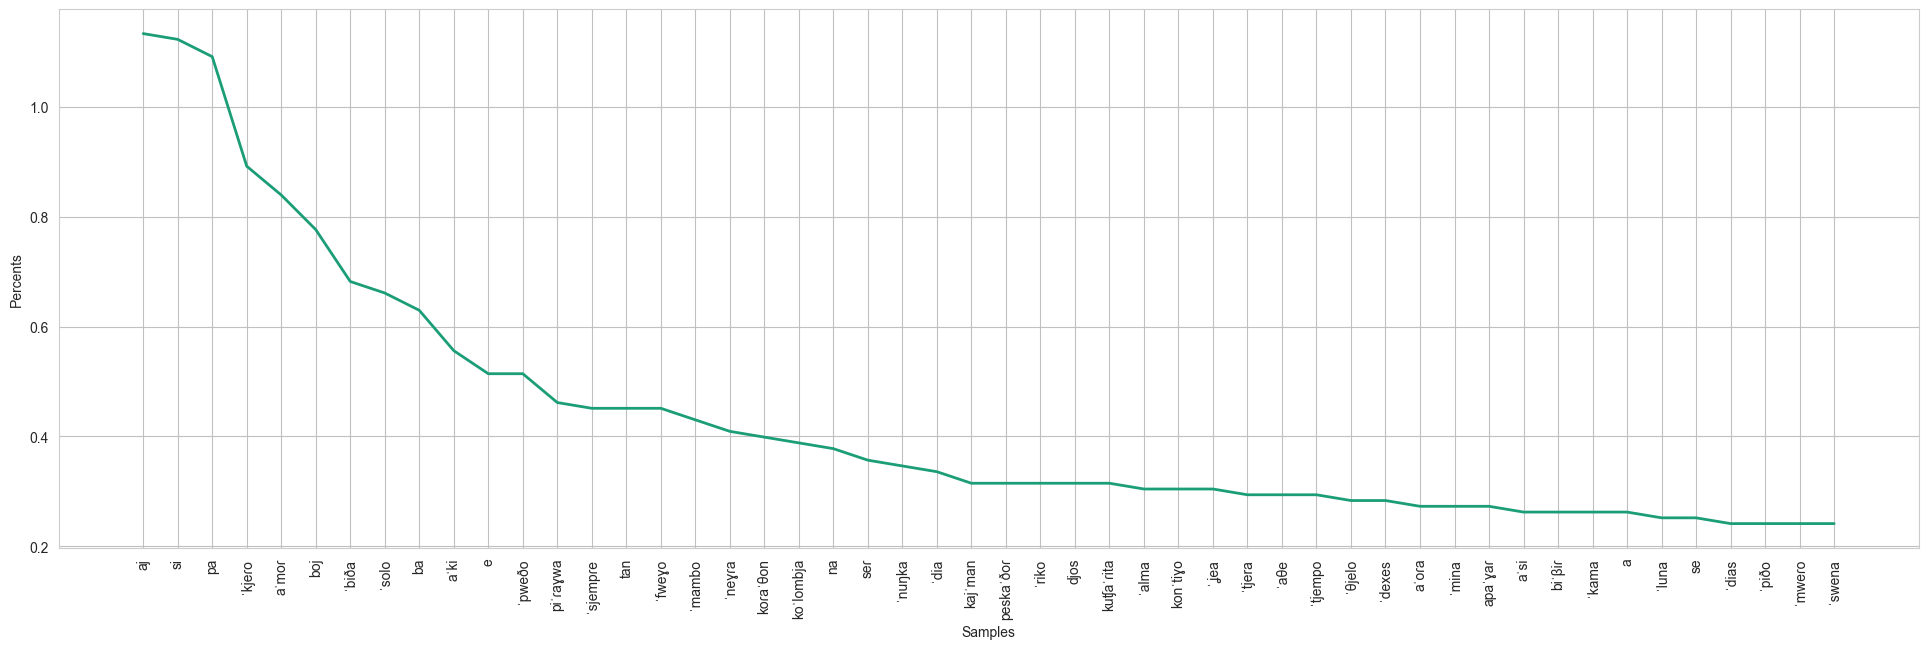

In [27]:
fig = plt.figure(figsize = (24, 7))
fd_words_fonetico = FreqDist(tokens_words_fonetico)
fd_words_fonetico.tabulate(50)
fd_words_fonetico.plot(50, percents=True)

In [28]:
fd_words_fonologico = FreqDist(tokens_words_fonologico)
fd_words_fonetico = FreqDist(tokens_words_fonetico)

fd_words_fonologico.tabulate(50)
fd_words_fonetico.tabulate(50)

top_n = 50
labels = [p for p, _ in fd_words_fonologico.most_common(top_n)]

values_fono = [fd_words_fonologico[p] for p in labels]
values_fonet = [fd_words_fonetico[p] for p in labels]

       aj        si        pa    ˈkjeɾo     aˈmoɾ       boj     ˈbida     ˈsolo        ba      aˈki         e    ˈpwedo  piˈɾagwa  ˈsjempɾe       tan    ˈfwego    ˈmambo    ˈnegɾa  koɾaˈθon koˈlombja        na       seɾ    ˈnunka      ˈdia   kajˈman peskaˈdoɾ     ˈriko      djos kuʧaˈɾita     ˈalma  konˈtigo      ˈʝea    ˈtjera      ˈaθe   ˈtjempo    ˈθjelo    ˈdexes     aˈoɾa     ˈmina   apaˈgaɾ      aˈsi    biˈbiɾ     ˈkama         a     ˈluna        se     ˈdias     ˈpido    ˈmweɾo    ˈswena 
      108       107       104        85        80        74        65        63        60        53        49        49        44        43        43        43        41        39        38        37        36        34        33        32        30        30        30        30        30        29        29        29        28        28        28        27        27        26        26        26        25        25        25        25        24        24        23        23        23        23

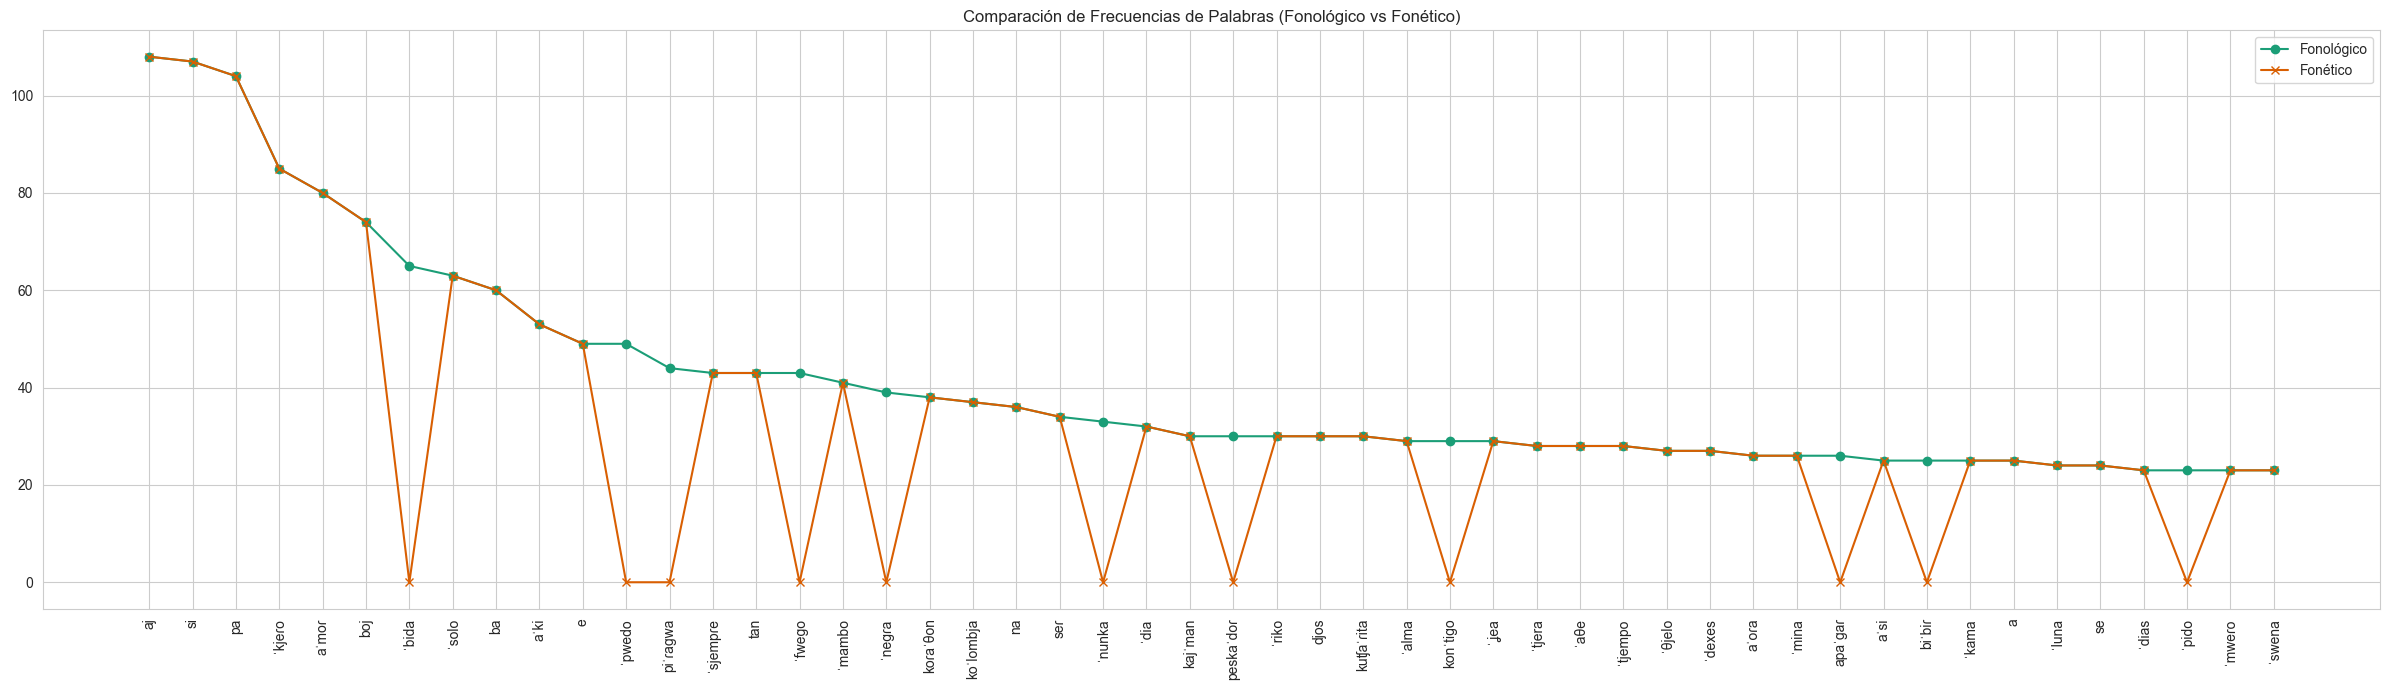

In [29]:
plt.figure(figsize=(24, 7))
plt.plot(labels, values_fono, marker='o', label="Fonológico")
plt.plot(labels, values_fonet, marker='x', label="Fonético")
plt.title("Comparación de Frecuencias de Palabras (Fonológico vs Fonético)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

   a   do   te   ka   ta   ɾa   na   ko   ma   to   de   da   ba  ˈdi   ɾo  ˈsi   go   me   ˈa  ˈba   lo  ˈpa   sa   pa  ˈmi   bo  ˈbi  ˈka   mo   re  ˈbe   la  ˈma   θe   be  ˈaj   so ˈkje  ˈɾa   po   ˈo   bi   es   no   se  kon   le  ˈki  ˈso  ˈɾi 
 827  514  383  363  309  303  283  283  260  258  223  223  208  202  196  190  178  177  175  174  170  169  168  168  160  157  154  138  134  127  124  122  121  121  119  117  112  112  106  104  102  102  101  100  100  100   96   93   92   90 


<Axes: xlabel='Samples', ylabel='Percents'>

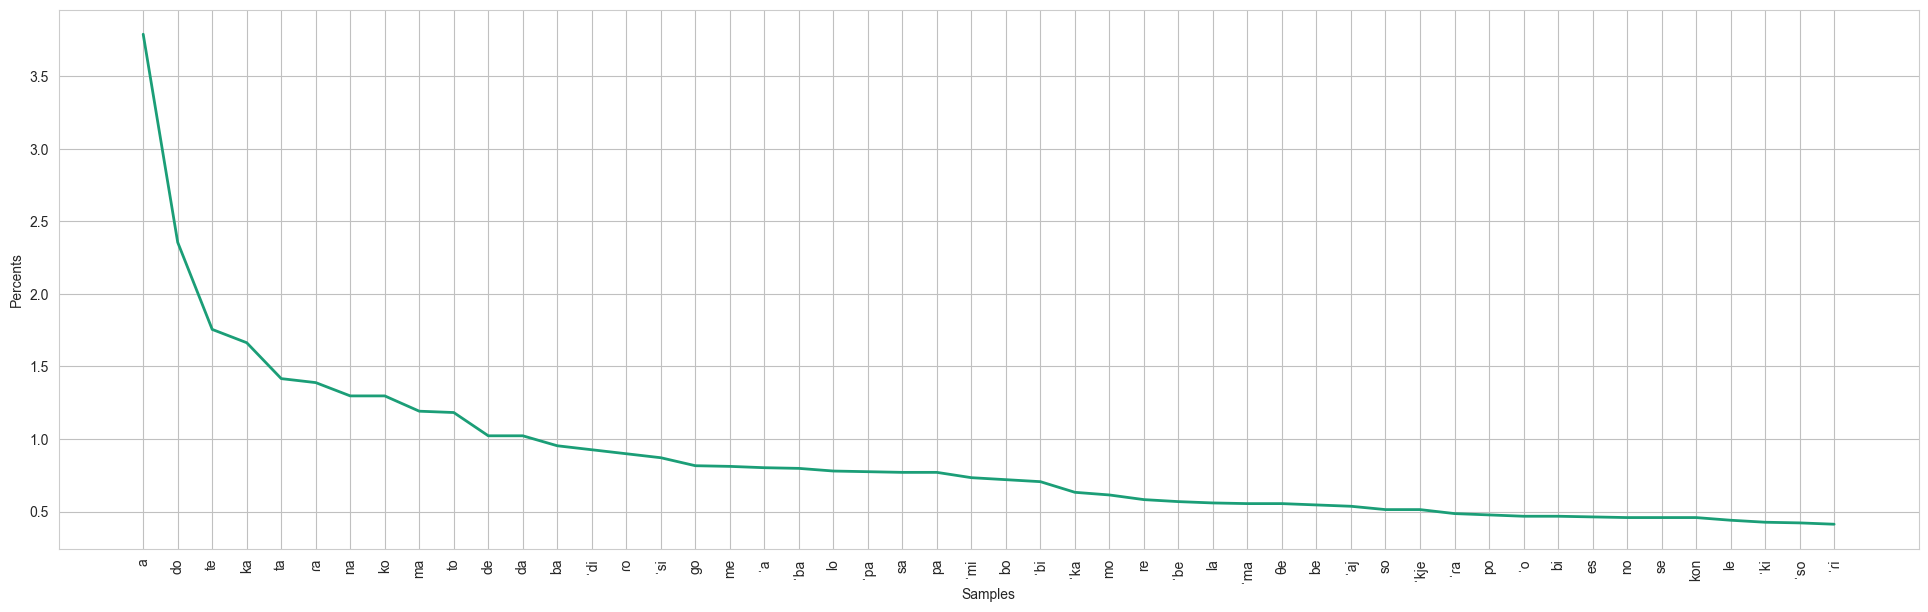

In [30]:
fig = plt.figure(figsize = (24, 7))
fd_silabas_fonologico = FreqDist(tokens_silabas_fonologico)
fd_silabas_fonologico.tabulate(50)
fd_silabas_fonologico.plot(50, percents=True)

   a   te   ka   ta   ɾa   na   ko   ðo   ma   to   do   ɾo   ða  ˈsi   me   ˈa  ˈdi   de   lo  ˈpa   sa   pa  ˈmi   βa  ˈka  ˈba   mo   ɣo   re   la  ˈma   θe  ˈaj   so ˈkje  ˈɾa   po  ˈbi   bo   ˈo   no   se   es   le  ˈki  ˈso  ˈɾi  ˈbe ˈpwe   ke 
 827  383  363  309  303  283  283  263  260  258  251  196  192  190  177  175  175  174  170  169  168  168  160  139  138  134  134  130  127  122  121  121  117  112  112  106  104  104  102  102  100  100   99   96   93   92   90   90   89   85 


<Axes: xlabel='Samples', ylabel='Percents'>

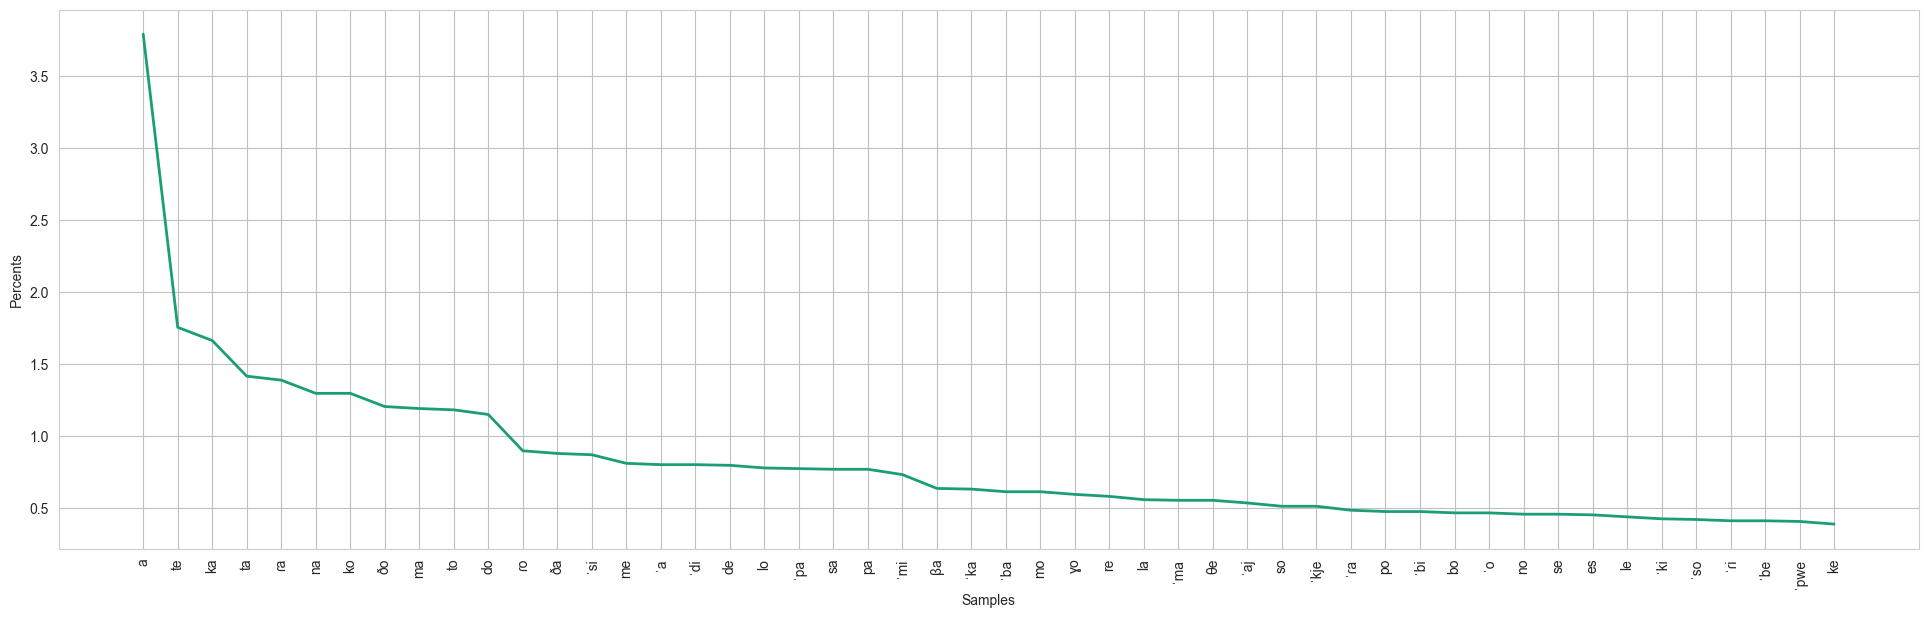

In [31]:
fig = plt.figure(figsize = (24, 7))
fd_silabas_fonetico = FreqDist(tokens_silabas_fonetico)
fd_silabas_fonetico.tabulate(50)
fd_silabas_fonetico.plot(50, percents=True)

In [32]:
fd_silabas_fonologico = FreqDist(tokens_silabas_fonologico)
fd_silabas_fonetico = FreqDist(tokens_silabas_fonetico)

fd_silabas_fonologico.tabulate(50)
fd_silabas_fonetico.tabulate(50)

top_n = 50
labels = [p for p, _ in fd_silabas_fonologico.most_common(top_n)]

values_fono = [fd_silabas_fonologico[p] for p in labels]
values_fonet = [fd_silabas_fonetico[p] for p in labels]

   a   do   te   ka   ta   ɾa   na   ko   ma   to   de   da   ba  ˈdi   ɾo  ˈsi   go   me   ˈa  ˈba   lo  ˈpa   sa   pa  ˈmi   bo  ˈbi  ˈka   mo   re  ˈbe   la  ˈma   θe   be  ˈaj   so ˈkje  ˈɾa   po   ˈo   bi   es   no   se  kon   le  ˈki  ˈso  ˈɾi 
 827  514  383  363  309  303  283  283  260  258  223  223  208  202  196  190  178  177  175  174  170  169  168  168  160  157  154  138  134  127  124  122  121  121  119  117  112  112  106  104  102  102  101  100  100  100   96   93   92   90 
   a   te   ka   ta   ɾa   na   ko   ðo   ma   to   do   ɾo   ða  ˈsi   me   ˈa  ˈdi   de   lo  ˈpa   sa   pa  ˈmi   βa  ˈka  ˈba   mo   ɣo   re   la  ˈma   θe  ˈaj   so ˈkje  ˈɾa   po  ˈbi   bo   ˈo   no   se   es   le  ˈki  ˈso  ˈɾi  ˈbe ˈpwe   ke 
 827  383  363  309  303  283  283  263  260  258  251  196  192  190  177  175  175  174  170  169  168  168  160  139  138  134  134  130  127  122  121  121  117  112  112  106  104  104  102  102  100  100   99   96   93   92   90   90   89   

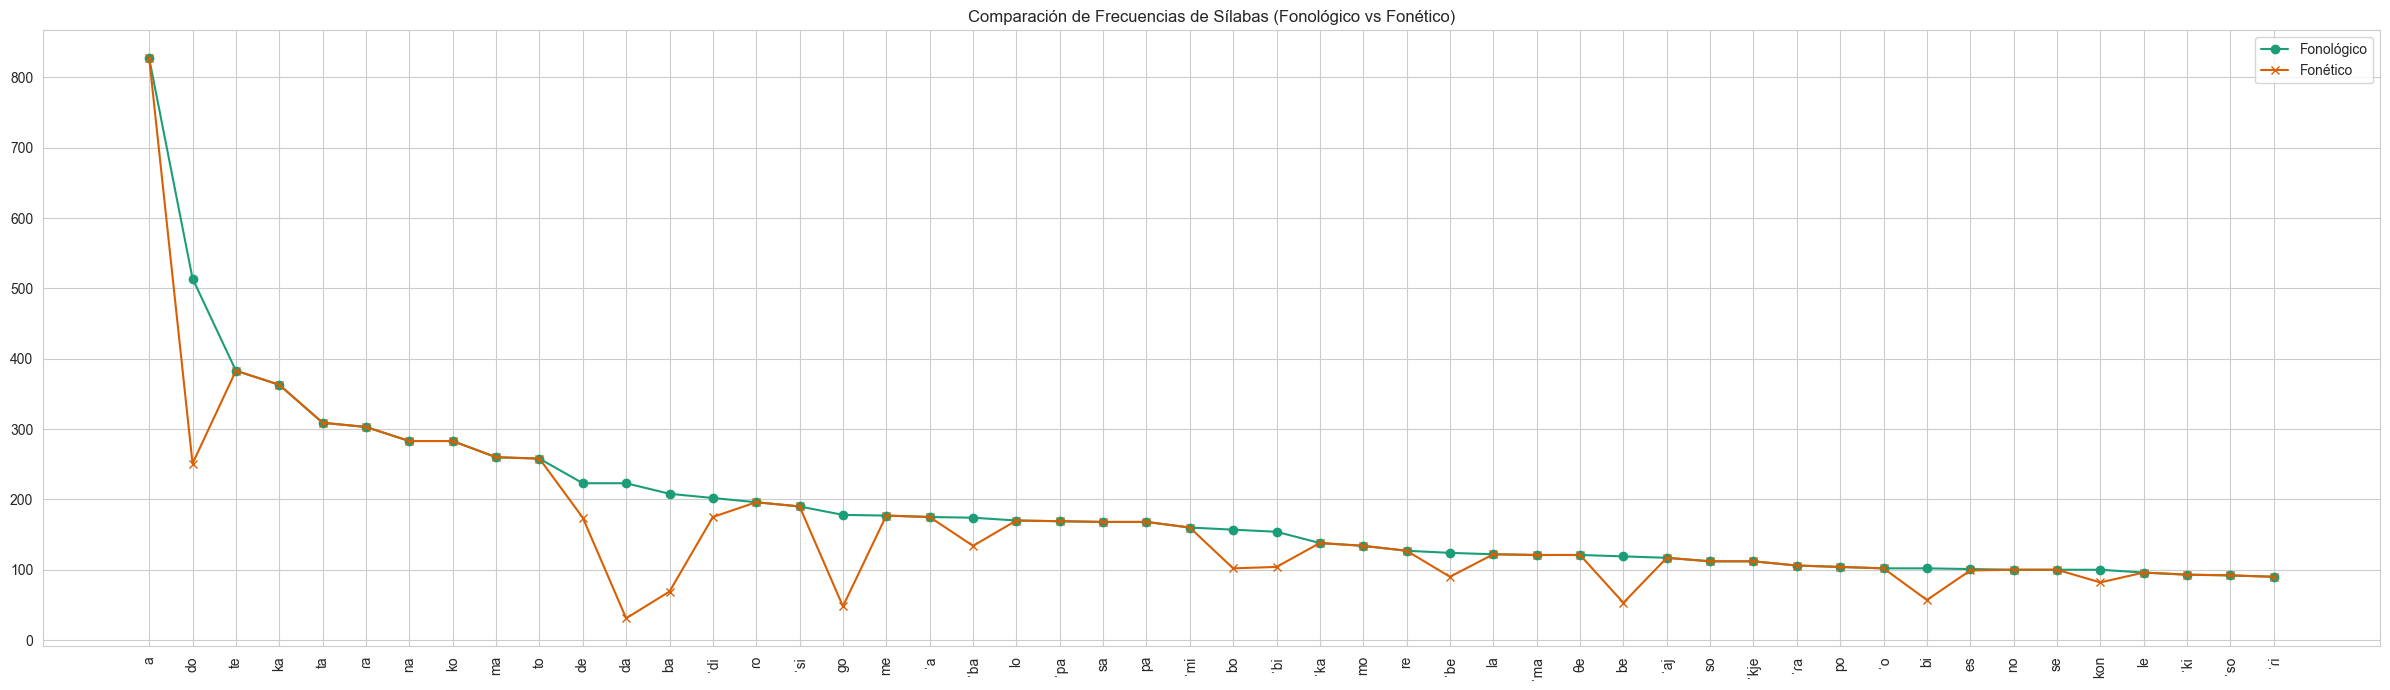

In [33]:
plt.figure(figsize=(24, 7))
plt.plot(labels, values_fono, marker='o', label="Fonológico")
plt.plot(labels, values_fonet, marker='x', label="Fonético")
plt.title("Comparación de Frecuencias de Sílabas (Fonológico vs Fonético)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.1. Comparación distribución fonética vs léxica

In [34]:
fd_lexica = FreqDist(words)
fd_words_fonetico = FreqDist(tokens_words_fonetico)

fd_lexica.tabulate(50)
fd_words_fonetico.tabulate(50)

top_n = 50
labels = [p for p, _ in fd_silabas_fonologico.most_common(top_n)]

pɾiˈmeɾo 
       1 
       aj        si        pa    ˈkjeɾo     aˈmoɾ       boj     ˈbiða     ˈsolo        ba      aˈki         e    ˈpweðo  piˈɾaɣwa  ˈsjempɾe       tan    ˈfweɣo    ˈmambo    ˈneɣɾa  koɾaˈθon koˈlombja        na       seɾ    ˈnuŋka      ˈdia   kajˈman peskaˈðoɾ     ˈriko      djos kuʧaˈɾita     ˈalma  konˈtiɣo      ˈʝea    ˈtjera      ˈaθe   ˈtjempo    ˈθjelo    ˈdexes     aˈoɾa     ˈmina   apaˈɣaɾ      aˈsi    biˈβiɾ     ˈkama         a     ˈluna        se     ˈdias     ˈpiðo    ˈmweɾo    ˈswena 
      108       107       104        85        80        74        65        63        60        53        49        49        44        43        43        43        41        39        38        37        36        34        33        32        30        30        30        30        30        29        29        29        28        28        28        27        27        26        26        26        25        25        25        25        24        24        23        23

In [35]:
df_words_unique = pd.DataFrame(set(words), columns=["Palabra"])

In [36]:
df_words_unique["Fonologia"] = df_words_unique["Palabra"].apply(lambda w:Transcription(w).phonology.words[0])

In [37]:
df_words_unique.head()

,Palabra,Fonologia
0,pɾiˈmeɾo,pɾiˈˈmeɾo


In [38]:
df_grouped = df_words_unique.groupby("Fonologia").agg(
    Palabras_asociadas=("Palabra", lambda x: list(set(x))),
    Num_palabras=("Palabra", "nunique")
).reset_index()

df_multiples = df_grouped[df_grouped["Num_palabras"] > 1].sort_values(by="Num_palabras", ascending=False)
len(df_multiples)

0

In [39]:
df_multiples

,Fonologia,Palabras_asociadas,Num_palabras


# 5. Análisis textométrico

In [50]:
letra_concat = concatenate_column(data_lyrics, 'letra')
print(letra_concat[:500])

Voy a empezar mi relato con alegría y con afán
Con alegría y con afán voy a empezar mi relato
En la población de Plato, se volvió un hombre caimán
Que en la población de Plato, se volvió un hombre caimán
(Se va el caimán, se va el caimán)
El caimán (se va para Barranquilla)
(Se va el caimán, se va el caimán)
El caimán (se va para Barranquilla)
Lo que come ese caimán es digno de admiración
Lo que come ese caimán es digno de admiración
Come queso y come pan, y toma trago de ron
Come queso y come p


In [53]:
textstat.flesch_reading_ease(letra_concat[:500])

-4.518529411764675

In [ ]:
textstat.flesch_reading_ease(text)

<Text: Voy a empezar mi relato con alegría y...>